In [94]:
!pip install tabula-py

In [95]:
import pandas as pd

In [96]:
import tabula

dados = tabula.read_pdf("https://acervo.fuvest.br/fuvest/2020/inscritos_2020.pdf",
                        pages = "all")
len(dados)

2

In [97]:
dados[0].head()

,CODIGO,NOME,VAGAS,INSCRITOS,C/V,VAGAS AC,INSCRITOS AC,C/V AC,VAGAS EP,INSCRITOS EP,C/V EP,VAGAS PPI,INSCRITOS PPI,C/V PPI
0,100,"Administração, Ciências Contábeis, Economia, E...",187,1562,"8,35",93,1165,"12,53",59,312,"5,29",35,85,"2,43"
1,101,Administração - Piracicaba,40,283,"7,08",22,196,"8,91",11,70,"6,36",7,17,"2,43"
2,105,Arquitetura - FAU,105,2724,"25,94",67,1924,"28,72",27,599,"22,19",11,201,"18,27"
3,110,Arquitetura - São Carlos,31,622,"20,06",15,408,"27,2",10,178,"17,8",6,36,6
4,115,Artes Cênicas,30,667,"22,23",16,411,"25,69",8,185,"23,13",6,71,"11,83"


In [98]:
dados[1].head()

,500,Medicina,122,15794,"129,46",67,11031,"164,64",33,3484,"105,58",22,1279,"58,14"
0,501.0,Medicina - Bauru,42,5217,"124,21",26,3952,152,8,887,"110,88",8,378,"47,25"
1,505.0,Medicina - Ribeirão Preto,77,6856,"89,04",55,5183,"94,24",18,1418,"78,78",4,255,"63,75"
2,510.0,Medicina Veterinária,56,2403,"42,91",38,1607,"42,29",11,615,"55,91",7,181,"25,86"
3,515.0,Medicina Veterinária - Pirassununga,42,906,"21,57",24,624,26,10,224,"22,4",8,58,"7,25"
4,520.0,Nutrição,56,854,"15,25",40,600,15,12,203,"16,92",4,51,"12,75"


In [99]:
dados[1].tail()

,500,Medicina,122,15794,"129,46",67,11031,"164,64",33,3484,"105,58",22,1279,"58,14"
47,870.0,Química (Bacharelado e Bacharelado com Atribui...,e Qua4li2d,de e Ma1te7r3i,"is) -4 S,1ã2o",Carlos23,112,"4,87",11,52,"4,73",8,9,"1,13"
48,875.0,Sistemas de Informação - São Carlos,35,342,"9,77",19,217,"11,42",10,104,"10,4",6,21,"3,5"
49,999.0,Treinamento E (Exatas),300,3530,"11,77",180,3177,"17,65",75,308,"4,11",45,45,1
50,NaN,Total das Carreiras,9217,129148,"14,01",5964,94888,"15,91",2082,26368,"12,66",1171,7892,"6,74"
51,NaN,Total das Carreiras sem Treineiros,8317,117019,"14,07",5424,83841,"15,46",1857,25450,"13,7",1036,7728,"7,46"


In [100]:
dados[1] = dados[1].iloc[:-2]
dados[1].tail()

,500,Medicina,122,15794,"129,46",67,11031,"164,64",33,3484,"105,58",22,1279,"58,14"
45,855.0,Química - Bacharelado e Licenciatura,84,752,"8,95",50,462,"9,24",20,220,11,14,70,5
46,865.0,Química - Licenciatura - Ribeirão Preto,28,61,"2,18",15,46,"3,07",8,10,"1,25",5,5,1
47,870.0,Química (Bacharelado e Bacharelado com Atribui...,e Qua4li2d,de e Ma1te7r3i,"is) -4 S,1ã2o",Carlos23,112,"4,87",11,52,"4,73",8,9,"1,13"
48,875.0,Sistemas de Informação - São Carlos,35,342,"9,77",19,217,"11,42",10,104,"10,4",6,21,"3,5"
49,999.0,Treinamento E (Exatas),300,3530,"11,77",180,3177,"17,65",75,308,"4,11",45,45,1


In [101]:
dados_columns = dados[0].columns
linha_extra = dados[1].columns
dados[1].columns = dados_columns
dados[1].head()

,CODIGO,NOME,VAGAS,INSCRITOS,C/V,VAGAS AC,INSCRITOS AC,C/V AC,VAGAS EP,INSCRITOS EP,C/V EP,VAGAS PPI,INSCRITOS PPI,C/V PPI
0,501.0,Medicina - Bauru,42,5217,"124,21",26,3952,152,8,887,"110,88",8,378,"47,25"
1,505.0,Medicina - Ribeirão Preto,77,6856,"89,04",55,5183,"94,24",18,1418,"78,78",4,255,"63,75"
2,510.0,Medicina Veterinária,56,2403,"42,91",38,1607,"42,29",11,615,"55,91",7,181,"25,86"
3,515.0,Medicina Veterinária - Pirassununga,42,906,"21,57",24,624,26,10,224,"22,4",8,58,"7,25"
4,520.0,Nutrição,56,854,"15,25",40,600,15,12,203,"16,92",4,51,"12,75"


In [102]:
dados.append(pd.DataFrame([linha_extra], columns=dados_columns))
dados[2].head()

,CODIGO,NOME,VAGAS,INSCRITOS,C/V,VAGAS AC,INSCRITOS AC,C/V AC,VAGAS EP,INSCRITOS EP,C/V EP,VAGAS PPI,INSCRITOS PPI,C/V PPI
0,500,Medicina,122,15794,"129,46",67,11031,"164,64",33,3484,"105,58",22,1279,"58,14"


In [103]:
dados = pd.concat(dados)
dados.head()

,CODIGO,NOME,VAGAS,INSCRITOS,C/V,VAGAS AC,INSCRITOS AC,C/V AC,VAGAS EP,INSCRITOS EP,C/V EP,VAGAS PPI,INSCRITOS PPI,C/V PPI
0,100,"Administração, Ciências Contábeis, Economia, E...",187,1562,"8,35",93,1165,"12,53",59,312,"5,29",35,85,"2,43"
1,101,Administração - Piracicaba,40,283,"7,08",22,196,"8,91",11,70,"6,36",7,17,"2,43"
2,105,Arquitetura - FAU,105,2724,"25,94",67,1924,"28,72",27,599,"22,19",11,201,"18,27"
3,110,Arquitetura - São Carlos,31,622,"20,06",15,408,"27,2",10,178,"17,8",6,36,6
4,115,Artes Cênicas,30,667,"22,23",16,411,"25,69",8,185,"23,13",6,71,"11,83"


In [104]:
len(dados)

109

In [105]:
dados = dados[["NOME", "VAGAS", "INSCRITOS", "C/V"]]
dados.head()

,NOME,VAGAS,INSCRITOS,C/V
0,"Administração, Ciências Contábeis, Economia, E...",187,1562,"8,35"
1,Administração - Piracicaba,40,283,"7,08"
2,Arquitetura - FAU,105,2724,"25,94"
3,Arquitetura - São Carlos,31,622,"20,06"
4,Artes Cênicas,30,667,"22,23"


In [106]:
dados.describe()

,NOME,VAGAS,INSCRITOS,C/V
count,109,109,109,109
unique,109,60,106,104
top,Nutrição e Metabolismo - Ribeirão Preto,28,158,"3,71"
freq,1,9,2,2


In [107]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NOME       109 non-null    object
 1   VAGAS      109 non-null    object
 2   INSCRITOS  109 non-null    object
 3   C/V        109 non-null    object
dtypes: object(4)
memory usage: 4.3+ KB


In [108]:
dados.tail()

,NOME,VAGAS,INSCRITOS,C/V
46,Química - Licenciatura - Ribeirão Preto,28,61,"2,18"
47,Química (Bacharelado e Bacharelado com Atribui...,e Qua4li2d,de e Ma1te7r3i,"is) -4 S,1ã2o"
48,Sistemas de Informação - São Carlos,35,342,"9,77"
49,Treinamento E (Exatas),300,3530,"11,77"
0,Medicina,122,15794,"129,46"


In [109]:
dados = dados.drop(47)
dados.tail()

,NOME,VAGAS,INSCRITOS,C/V
45,Química - Bacharelado e Licenciatura,84,752,"8,95"
46,Química - Licenciatura - Ribeirão Preto,28,61,"2,18"
48,Sistemas de Informação - São Carlos,35,342,"9,77"
49,Treinamento E (Exatas),300,3530,"11,77"
0,Medicina,122,15794,"129,46"


In [110]:
dados.describe()

,NOME,VAGAS,INSCRITOS,C/V
count,107,107,107,107
unique,107,58,104,102
top,Nutrição e Metabolismo - Ribeirão Preto,28,158,"6,04"
freq,1,9,2,2


In [112]:
dados["candidatos"] = pd.to_numeric(dados["INSCRITOS"], errors="coerce")
dados["vagas"] = pd.to_numeric(dados["VAGAS"], errors="coerce")
dados["candidatos_por_vaga"] = dados["candidatos"] / dados["vagas"]
dados["nome"] = dados["NOME"]
dados = dados.dropna()
dados["candidatos"] = dados["candidatos"].astype(int)
dados["vagas"] = dados["vagas"].astype(int)
dados.describe()

,candidatos,vagas,candidatos_por_vaga
count,105.000000,105.000000,105.000000
mean,1193.066667,81.771429,15.273537
std,2181.669426,115.123534,21.092466
min,45.000000,12.000000,1.607143
25%,163.000000,28.000000,5.000000
50%,483.000000,42.000000,8.352941
75%,1092.000000,84.000000,15.116667
max,15794.000000,783.000000,129.459016


In [113]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 0
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOME                 105 non-null    object 
 1   VAGAS                105 non-null    object 
 2   INSCRITOS            105 non-null    object 
 3   C/V                  105 non-null    object 
 4   candidatos           105 non-null    int64  
 5   vagas                105 non-null    int64  
 6   candidatos_por_vaga  105 non-null    float64
 7   nome                 105 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 7.4+ KB


In [114]:
dados = dados[["nome", "vagas", "candidatos", "candidatos_por_vaga"]]
dados = dados.sort_values("candidatos_por_vaga", ascending=False)
dados.head(30)

,nome,vagas,candidatos,candidatos_por_vaga
0,Medicina,122,15794,129.459016
0,Medicina - Bauru,42,5217,124.214286
1,Medicina - Ribeirão Preto,77,6856,89.038961
10,Psicologia,49,3610,73.673469
31,Relações Internacionais,42,2461,58.595238
9,Curso Superior do Audiovisual,24,1126,46.916667
11,Psicologia - Ribeirão Preto,29,1254,43.241379
2,Medicina Veterinária,56,2403,42.910714
40,Ciências Biomédicas,28,1042,37.214286
10,Design,28,906,32.357143


In [115]:
curso = 'Medicina'
linha = dados.query("nome==@curso").iloc[0]
vagas = linha['vagas']
candidatos = linha['candidatos']
vagas, candidatos

(122, 15794)

In [116]:
import numpy as np

np.random.seed(537846)

def gera(media, desvio_padrao, candidatos):
  return np.random.normal(media, desvio_padrao, candidatos)

proprio_esforco = gera(70, 10, candidatos)
proprio_esforco

array([68.54575938, 73.8392757 , 52.17456233, ..., 80.92326482,
       64.31312253, 72.88962942])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


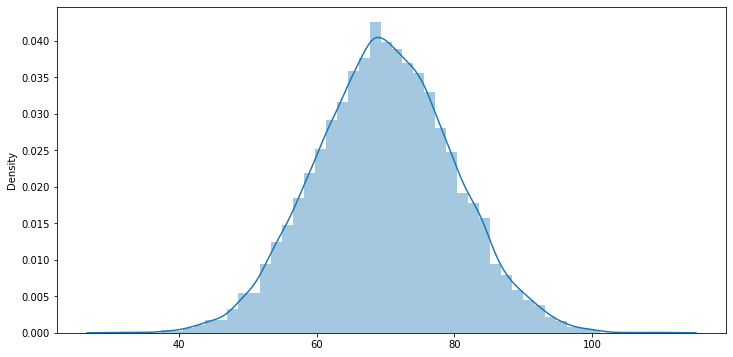

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.distplot(proprio_esforco)
plt.show()

In [118]:
import numpy as np

def gera_sorte(candidatos):
  # DESAFIO: inserir a desigualdade
  return np.random.uniform(0, 100, candidatos)

sorte = gera_sorte(candidatos)
sorte

array([42.03700341, 67.04055542, 50.72347161, ..., 50.16007514,
       50.86301304, 68.26186712])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


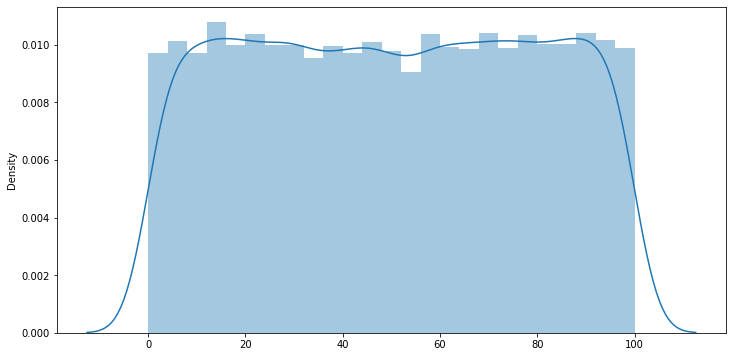

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.distplot(sorte)
plt.show()

In [141]:
def gera_df_candidatos(proprio_esforco, sorte, vagas, fator_sorte = 0.05, identificador = None):
  dados_gerais = np.array([proprio_esforco, sorte]).T
  candidatos_gerais = pd.DataFrame(dados_gerais, columns=["proprio_esforco", "sorte"])
  candidatos_gerais = candidatos_gerais.sort_values("proprio_esforco", ascending=False)
  if identificador is None:
    identificador = range(len(candidatos_gerais))
  candidatos_gerais["identificador"] = identificador
  candidatos_gerais["nota_final"] = candidatos_gerais["proprio_esforco"] * (1-fator_sorte) + candidatos_gerais["sorte"] * fator_sorte

  selecionadas_esforco_e_sorte = candidatos_gerais.sort_values("nota_final", ascending=False).head(vagas)["identificador"]
  selecionadas_esforco = candidatos_gerais.head(vagas)["identificador"]
  return candidatos_gerais, selecionadas_esforco, selecionadas_esforco_e_sorte

In [142]:
candidatos_gerais, selecionadas_esforco, selecionadas_esforco_sorte = gera_df_candidatos(proprio_esforco, sorte, vagas, 0.05)
selecionadas_esforco, selecionadas_esforco_sorte

(1132       0
 4149       1
 14303      2
 6593       3
 11130      4
         ... 
 10862    117
 14045    118
 13295    119
 12156    120
 10617    121
 Name: identificador, Length: 122, dtype: int64, 1132       0
 4149       1
 14303      2
 6593       3
 11130      4
         ... 
 5151      93
 15662     85
 13536    203
 15311    142
 7858     106
 Name: identificador, Length: 122, dtype: int64)

In [156]:
def calcula_resultado(candidatos, vagas, conjunto1, conjunto2, debug = True):
  comum = len(np.intersect1d(conjunto1, conjunto2))
  diferentes = vagas - comum
  proporcao_esforco_e_sorte = diferentes / vagas * 100
  if debug:
    print(f"Com {candidatos} candidatas, {vagas} vagas, somente {comum} passaram por 'puro esforco', outras {diferentes} passaram com esforco e sorte. {proporcao_esforco_e_sorte:.4}% precisaram de sorte.")
  return proporcao_esforco_e_sorte

calcula_resultado(candidatos, vagas, selecionadas_esforco, selecionadas_esforco_sorte)

Com 15794 candidatas, 122 vagas, somente 101 passaram por 'puro esforco', outras 21 passaram com esforco e sorte. 17.21% precisaram de sorte.


17.21311475409836

In [151]:
# DESAFIO: parsear
# https://www.fuvest.br/wp-content/uploads/fuvest_2020_nota_de_corte.pdf

In [152]:
corte_segunda_fase = 303+141+88


In [160]:

def simulacao_inteira(candidatos: int, corte_segunda_fase: int, vagas: int, fator_sorte: float):
  proprio_esforco = gera(70, 10, candidatos)
  sorte = gera_sorte(candidatos)
  candidatos_gerais_fase1, selecionadas_esforco_fase1, selecionadas_esforco_sorte_fase1 = gera_df_candidatos(proprio_esforco, sorte, corte_segunda_fase, fator_sorte)

  resultado_fase_1_geral = candidatos_gerais_fase1.set_index("identificador")
  
  selecionadas_esforco_final = selecionadas_esforco_fase1[:vagas]

  candidatos_fase_2 = resultado_fase_1_geral.loc[selecionadas_esforco_sorte_fase1]
  _, _, selecionadas_esforco_sorte_fase2 = gera_df_candidatos(candidatos_fase_2["proprio_esforco"], candidatos_fase_2["sorte"], vagas, fator_sorte, candidatos_fase_2.index)
  return calcula_resultado(candidatos, vagas, selecionadas_esforco_final, selecionadas_esforco_sorte_fase2, debug=False)


simulacao_inteira(candidatos, corte_segunda_fase, vagas, 0.05)


29.508196721311474

In [161]:
from tqdm import tqdm

100%|██████████| 1000/1000 [00:14<00:00, 68.26it/s]

23.458196721311477



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


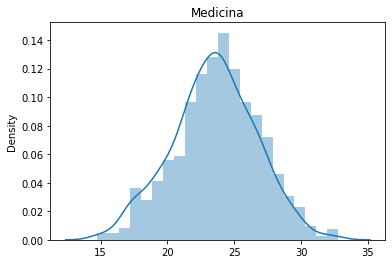

In [166]:
porcentagem_precisou_de_sorte = [simulacao_inteira(candidatos, corte_segunda_fase, vagas, 0.05) for i in tqdm(range(1000))]
print(np.mean(porcentagem_precisou_de_sorte))
plt.title("Medicina")
sns.distplot(porcentagem_precisou_de_sorte)

100%|██████████| 1000/1000 [00:09<00:00, 110.04it/s]


16.062878787878788


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


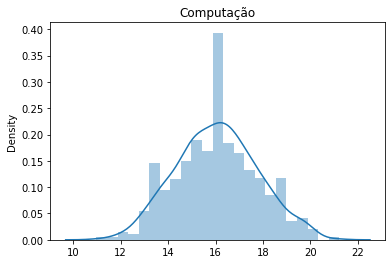

In [167]:
porcentagem_precisou_de_sorte = [simulacao_inteira(2125+943+233, 648+287+149, 264, 0.05) for i in tqdm(range(1000))]
print(np.mean(porcentagem_precisou_de_sorte))
plt.title("Computação")
sns.distplot(porcentagem_precisou_de_sorte)

In [165]:
# desafio, calcular para outra area

In [ ]:
resultados = []
for i in tqdm(range(20)):
  fator_sorte = i / 100
  porcentagem_precisou_de_sorte = [simulacao_inteira(candidatos, corte_segunda_fase, vagas, fator_sorte) for i in range(1000)]
  resultados.append([fator_sorte, np.mean(porcentagem_precisou_de_sorte)])


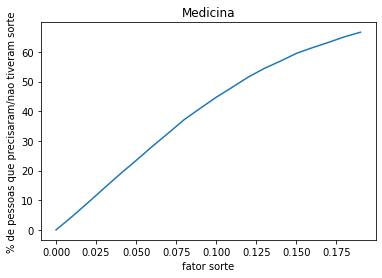

In [170]:

df = pd.DataFrame(resultados, columns=["fator sorte", "% de pessoas que precisaram/nao tiveram sorte"])
plt.title("Medicina")
sns.lineplot(data=df, x="fator sorte", y="% de pessoas que precisaram/nao tiveram sorte")